In [1]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


The following returns the full state sequence

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Let's add this model to our IMDB movie-review classification 

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [5]:
max_features = 10000
maxlen = 500
batch_size = 32

In [6]:
print('Loading Data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Loading Data...


In [7]:
print(len(input_train), 'train_sequences')
print(len(input_test), 'test_sequences')

25000 train_sequences
25000 test_sequences


In [8]:
print('Pad sequences (samples X time)')

Pad sequences (samples X time)


In [9]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [10]:
print('input_train_shape: ', input_train.shape)
print('input_test_shape: ', input_test.shape)

input_train_shape:  (25000, 500)
input_test_shape:  (25000, 500)


In [11]:
from keras.layers import Dense

In [12]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [13]:
history =  model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size=128,
                    validation_split=0.2)

/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 942us/step - loss: 0.6031 - acc: 0.6618 - val_loss: 0.4693 - val_acc: 0.7998
Epoch 2/10
20000/20000 [==============================] - 19s 951us/step - loss: 0.3782 - acc: 0.8440 - val_loss: 0.4496 - val_acc: 0.7900
Epoch 3/10
20000/20000 [==============================] - 19s 959us/step - loss: 0.2972 - acc: 0.8812 - val_loss: 0.4504 - val_acc: 0.7880
Epoch 4/10
20000/20000 [==============================] - 19s 956us/step - loss: 0.2230 - acc: 0.9165 - val_loss: 0.3955 - val_acc: 0.8336
Epoch 5/10
20000/20000 [==============================] - 19s 971us/step - loss: 0.1611 - acc: 0.9434 - val_loss: 0.5960 - val_acc: 0.7362
Epoch 6/10
20000/20000 [==============================] - 19s 967us/step - loss: 0.1110 - acc: 0.9624 - val_loss: 0.4224 - val_acc: 0.8500
Epoch 7/10
20000/20000 [==============================] - 19s 968us/step - loss: 0.0761 - acc: 0.9757 - val_loss: 0.5

In [14]:
import matplotlib.pyplot as plt

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_acc']

In [16]:
epochs = range(1, len(acc)+ 1)

<Figure size 432x288 with 0 Axes>

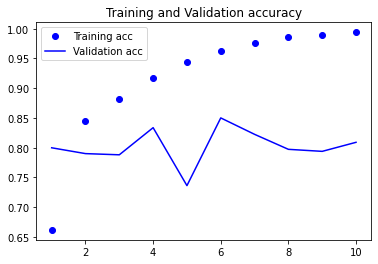

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

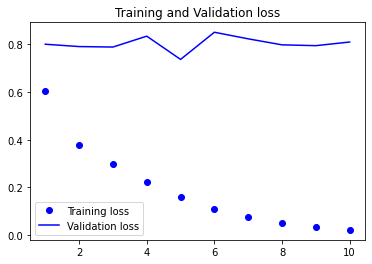

In [21]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [22]:
from keras.layers import LSTM

In [23]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
history =  model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size=128,
                    validation_split=0.2)

/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.4931 - acc: 0.7645 - val_loss: 0.3564 - val_acc: 0.8480
Epoch 2/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2880 - acc: 0.8861 - val_loss: 0.3000 - val_acc: 0.8852
Epoch 3/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.2307 - acc: 0.9136 - val_loss: 0.4847 - val_acc: 0.8118
Epoch 4/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1976 - acc: 0.9276 - val_loss: 0.4409 - val_acc: 0.8202
Epoch 5/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.1758 - acc: 0.9349 - val_loss: 0.2886 - val_acc: 0.8846
Epoch 6/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.1560 - acc: 0.9433 - val_loss: 0.3058 - val_acc: 0.8702
Epoch 7/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1445 - acc: 0.9468 - val_loss: 0.3659 - val_acc:

<Figure size 432x288 with 0 Axes>

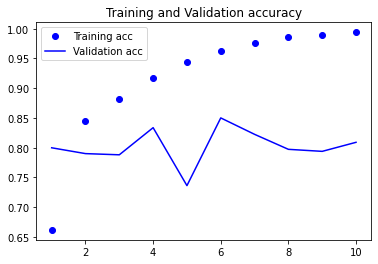

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

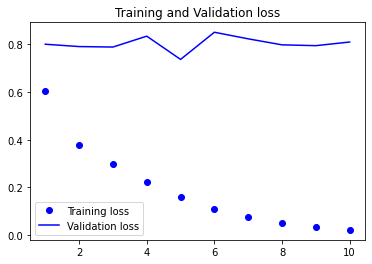

In [26]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()